## Analisis Komponen Utama ##

Tahapan analisis komponen utama adalah sebagai berikut:
1. Import libraries
2. Load data
3. Data cleaning
4. Data preprocessing
5. Fitting PCA
6. Transform data
7. Clustering dengan model KMeans

### Import Libraries ###

In [1]:
# Import libraries dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import libraries khusus untuk PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Load Data ###

In [6]:
# Load data
data = pd.read_csv('sales_data_sample.csv', encoding='latin')


data.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


### Data Cleaning ###

In [7]:
# Check missing value
data.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [8]:
# Membuat list kolom yang akan di drop
columns_to_drop = ['ORDERNUMBER', 'ORDERDATE', 'QTR_ID','MONTH_ID', 'PRODUCTCODE', 
                   'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 
                   'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME',
                   'CONTACTFIRSTNAME']

for col in columns_to_drop:
    data = data.drop(col, axis=1)

data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,2003,Motorcycles,95,USA,Small
1,34,81.35,5,2765.90,Shipped,2003,Motorcycles,95,France,Small
2,41,94.74,2,3884.34,Shipped,2003,Motorcycles,95,France,Medium
3,45,83.26,6,3746.70,Shipped,2003,Motorcycles,95,USA,Medium
4,49,100.00,14,5205.27,Shipped,2003,Motorcycles,95,USA,Medium


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   STATUS           2823 non-null   object 
 5   YEAR_ID          2823 non-null   int64  
 6   PRODUCTLINE      2823 non-null   object 
 7   MSRP             2823 non-null   int64  
 8   COUNTRY          2823 non-null   object 
 9   DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 220.7+ KB


### Data Preprocessing ###

In [10]:
# Membuat dummy variables
data = pd.get_dummies(data, drop_first=True)


data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,YEAR_ID,MSRP,STATUS_Disputed,STATUS_In Process,STATUS_On Hold,STATUS_Resolved,...,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Medium,DEALSIZE_Small
0,30,95.70,2,2871.00,2003,95,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,34,81.35,5,2765.90,2003,95,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,2003,95,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,2003,95,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4,49,100.00,14,5205.27,2003,95,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [12]:
# Siapkan model scaler
scaler = StandardScaler()


# Ubah data menjadi standard
X = scaler.fit_transform(data)
X = pd.DataFrame(X, columns=data.columns)
X.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,YEAR_ID,MSRP,STATUS_Disputed,STATUS_In Process,STATUS_On Hold,STATUS_Resolved,...,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Medium,DEALSIZE_Small
0,-0.522891,0.596978,-1.057059,-0.370825,-1.16517,-0.142246,-0.070597,-0.121399,-0.125829,-0.130119,...,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,1.346014,-0.980703,1.09637
1,-0.112201,-0.114450,-0.347015,-0.427897,-1.16517,-0.142246,-0.070597,-0.121399,-0.125829,-0.130119,...,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,-0.742934,-0.980703,1.09637
2,0.606505,0.549384,-1.057059,0.179443,-1.16517,-0.142246,-0.070597,-0.121399,-0.125829,-0.130119,...,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,-0.742934,1.019676,-0.91210
3,1.017195,-0.019759,-0.110334,0.104701,-1.16517,-0.142246,-0.070597,-0.121399,-0.125829,-0.130119,...,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,1.346014,1.019676,-0.91210
4,1.427884,0.810158,1.783116,0.896740,-1.16517,-0.142246,-0.070597,-0.121399,-0.125829,-0.130119,...,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,1.346014,1.019676,-0.91210


### Fitting Data ###

In [13]:
# Siapkan model PCA, dengan 4 komponen
pca = PCA(n_components=4)


# Fitting data
pca.fit(X)

PCA(n_components=4)

### Transform Data ###

In [15]:
# Transform X menjadi X_pca
X_pca = pca.transform(X)
X_pca = pd.DataFrame(X_pca, columns=['pca_feature_1', 'pca_feature_2',
                                     'pca_feature_3', 'pca_feature_4'])

X_pca.head()

,pca_feature_1,pca_feature_2,pca_feature_3,pca_feature_4
0,-0.900705,-1.150922,1.958925,1.068373
1,-1.224271,-1.129810,0.056464,2.837793
2,1.301602,-1.052989,0.107157,2.860069
3,1.159578,-0.972078,2.060182,0.841396
4,1.902620,-1.000081,1.894098,0.419558


### Clustering dengan model KMeans ###

In [16]:
# Siapkan model KMeans
kmeans = KMeans(n_clusters=3)


# prediksi label data
label = kmeans.fit_predict(X_pca)

c:\Users\septi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, ..., 2, 1, 2])

In [17]:
# Masukan label ke dataframe X_pca
X_pca['label'] = label
X_pca.head()

,pca_feature_1,pca_feature_2,pca_feature_3,pca_feature_4,label
0,-0.900705,-1.150922,1.958925,1.068373,1
1,-1.224271,-1.129810,0.056464,2.837793,1
2,1.301602,-1.052989,0.107157,2.860069,0
3,1.159578,-0.972078,2.060182,0.841396,0
4,1.902620,-1.000081,1.894098,0.419558,0


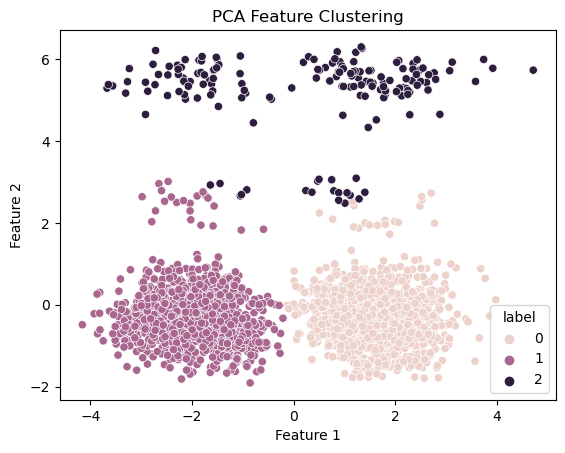

In [20]:
sns.scatterplot(data=X_pca,
                x='pca_feature_1',
                y='pca_feature_2', hue='label')
plt.title('PCA Feature Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()